# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Litmatch_1.csv")
df.head()

,userName,score,at,content
0,Gemer Dracz,5,2024-05-02 07:44:48,Keren aplikasi ini bisa membantu nyri pcr
1,Akun ke 2,5,2024-05-02 07:22:27,Sangat bagus
2,Aldyansyah Ramadani,5,2024-05-02 06:07:49,"bagus sekali,saya bisa kenal banyak teman di a..."
3,Ban'k Ri,1,2024-05-02 06:01:39,maksa bnget buat d download udah d skip ttp aj...
4,Firman Ganteng,5,2024-05-02 05:45:55,Riyan 007


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Keren aplikasi ini bisa membantu nyri pcr,Gemer Dracz,2024-05-02 07:44:48
1,Sangat bagus,Akun ke 2,2024-05-02 07:22:27
2,"bagus sekali,saya bisa kenal banyak teman di a...",Aldyansyah Ramadani,2024-05-02 06:07:49
3,maksa bnget buat d download udah d skip ttp aj...,Ban'k Ri,2024-05-02 06:01:39
4,Riyan 007,Firman Ganteng,2024-05-02 05:45:55
...,...,...,...
393,Litmatch sangat seru di sini kita cepat dapat ...,Fikram Brutal,2024-04-23 12:49:39
394,Coba dulu,Awang Pancaagita,2024-04-23 12:49:08
395,"Perbaharui terus, dulu bisa dapet hujan diamon...",Vensca Pattiwaellapia,2024-04-23 12:37:48
396,👍,Madlias Kemod,2024-04-23 12:13:32


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   398 non-null    object
 1   userName  398 non-null    object
 2   at        398 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,398,398,398
unique,371,398,398
top,Bagus,Gemer Dracz,2024-05-02 07:44:48
freq,16,1,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(398, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(371, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,keren aplikasi ini bisa membantu nyri pcr,Gemer Dracz,2024-05-02 07:44:48
1,sangat bagus,Akun ke 2,2024-05-02 07:22:27
2,bagus sekalisaya bisa kenal banyak teman di ap...,Aldyansyah Ramadani,2024-05-02 06:07:49
3,maksa bnget buat d download udah d skip ttp aj...,Ban'k Ri,2024-05-02 06:01:39
4,riyan 007,Firman Ganteng,2024-05-02 05:45:55
...,...,...,...
392,lemot kali apk ni padahal jaringan gua bagus g...,Akagamino sanks,2024-04-23 13:04:55
393,litmatch sangat seru di sini kita cepat dapat ...,Fikram Brutal,2024-04-23 12:49:39
394,coba dulu,Awang Pancaagita,2024-04-23 12:49:08
395,perbaharui terus dulu bisa dapet hujan diamond...,Vensca Pattiwaellapia,2024-04-23 12:37:48


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,keren aplikasi ini bisa membantu nyari pacar,Gemer Dracz,2024-05-02 07:44:48
1,sangat bagus,Akun ke 2,2024-05-02 07:22:27
2,bagus sekali saya bisa kenal banyak teman di a...,Aldyansyah Ramadani,2024-05-02 06:07:49
3,maksa bnget buat d download udah d skip tetap ...,Ban'k Ri,2024-05-02 06:01:39
4,riyan,Firman Ganteng,2024-05-02 05:45:55
...,...,...,...
392,lemot kali aplikasi ni padahal jaringan gua ba...,Akagamino sanks,2024-04-23 13:04:55
393,litmatch sangat seru di sini kita cepat dapat ...,Fikram Brutal,2024-04-23 12:49:39
394,coba dulu,Awang Pancaagita,2024-04-23 12:49:08
395,perbaharui terus dulu bisa dapet hujan diamond...,Vensca Pattiwaellapia,2024-04-23 12:37:48


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,keren aplikasi bisa membantu nyari pacar,Gemer Dracz,2024-05-02 07:44:48
1,sangat bagus,Akun ke 2,2024-05-02 07:22:27
2,bagus sekali bisa kenal banyak teman aplikasi,Aldyansyah Ramadani,2024-05-02 06:07:49
3,maksa bnget buat d download udah d skip tetap ...,Ban'k Ri,2024-05-02 06:01:39
4,riyan,Firman Ganteng,2024-05-02 05:45:55
...,...,...,...
392,lemot kali aplikasi ni padahal jaringan gua ba...,Akagamino sanks,2024-04-23 13:04:55
393,litmatch sangat seru sini cepat teman banyak k...,Fikram Brutal,2024-04-23 12:49:39
394,coba dulu,Awang Pancaagita,2024-04-23 12:49:08
395,perbaharui terus dulu dapet hujan diamond full...,Vensca Pattiwaellapia,2024-04-23 12:37:48


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0        [keren, aplikasi, bisa, membantu, nyari, pacar]
1                                        [sangat, bagus]
2      [bagus, sekali, bisa, kenal, banyak, teman, ap...
3      [maksa, bnget, buat, d, download, udah, d, ski...
4                                                [riyan]
                             ...                        
392    [lemot, kali, aplikasi, ni, padahal, jaringan,...
393    [litmatch, sangat, seru, sini, cepat, teman, b...
394                                         [coba, dulu]
395    [perbaharui, terus, dulu, dapet, hujan, diamon...
396                                                   []
Name: content, Length: 371, dtype: object

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Litmatch_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Litmatch_1.csv', encoding = 'latin1')
df_clean

,content
0,keren aplikasi bisa bantu nyari pacar
1,sangat bagus
2,bagus sekali bisa kenal banyak teman aplikasi
3,maksa bnget buat d download udah d skip tetap ...
4,riyan
...,...
366,lot kali aplikasi ni padahal jaring gua bagus ...
367,litmatch sangat seru sini cepat teman banyak k...
368,coba dulu
369,baharu terus dulu dapet hujan diamond full skr...


# **Translate**

In [21]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Litmatch_1.csv', encoding='latin1')

In [24]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [27]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Litmatch_1.csv')

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Litmatch_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,keren aplikasi bisa bantu nyari pacar,"fontcolor="" # FFFF00""cool app fontcolor="" # FF..."
1,1,sangat bagus,Very good.
2,2,bagus sekali bisa kenal banyak teman aplikasi,It's good to know a lot of app friends.
3,3,maksa bnget buat d download udah d skip tetap ...,"fontcolor="" # FFFF00""mightnotmake fontcolor="" ..."
4,4,riyan,riyan
...,...,...,...
366,366,lot kali aplikasi ni padahal jaring gua bagus ...,lot of times this app when my nets are nice th...
367,367,litmatch sangat seru sini cepat teman banyak k...,"Litmatch is so exciting here. Hurry up, guys. ..."
368,368,coba dulu,Try it first.
369,369,baharu terus dulu dapet hujan diamond full skr...,The rain envelopes are still coming up. Diamon...


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Litmatch_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,keren aplikasi bisa bantu nyari pacar,"fontcolor="" # FFFF00""cool app fontcolor="" # FF..."
1,1,sangat bagus,Very good.
2,2,bagus sekali bisa kenal banyak teman aplikasi,It's good to know a lot of app friends.
3,3,maksa bnget buat d download udah d skip tetap ...,"fontcolor="" # FFFF00""mightnotmake fontcolor="" ..."
4,4,riyan,riyan
...,...,...,...
366,366,lot kali aplikasi ni padahal jaring gua bagus ...,lot of times this app when my nets are nice th...
367,367,litmatch sangat seru sini cepat teman banyak k...,"Litmatch is so exciting here. Hurry up, guys. ..."
368,368,coba dulu,Try it first.
369,369,baharu terus dulu dapet hujan diamond full skr...,The rain envelopes are still coming up. Diamon...


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 168
Netral = 154
Negatif = 49

Total Data Seluruhnya : 371


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,keren aplikasi bisa bantu nyari pacar,"fontcolor="" # FFFF00""cool app fontcolor="" # FF...",Positif
1,1,sangat bagus,Very good.,Positif
2,2,bagus sekali bisa kenal banyak teman aplikasi,It's good to know a lot of app friends.,Positif
3,3,maksa bnget buat d download udah d skip tetap ...,"fontcolor="" # FFFF00""mightnotmake fontcolor="" ...",Netral
4,4,riyan,riyan,Netral
...,...,...,...,...
366,366,lot kali aplikasi ni padahal jaring gua bagus ...,lot of times this app when my nets are nice th...,Positif
367,367,litmatch sangat seru sini cepat teman banyak k...,"Litmatch is so exciting here. Hurry up, guys. ...",Positif
368,368,coba dulu,Try it first.,Positif
369,369,baharu terus dulu dapet hujan diamond full skr...,The rain envelopes are still coming up. Diamon...,Positif


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,keren aplikasi bisa bantu nyari pacar,"fontcolor="" # FFFF00""cool app fontcolor="" # FF...",Positif
1,sangat bagus,Very good.,Positif
2,bagus sekali bisa kenal banyak teman aplikasi,It's good to know a lot of app friends.,Positif
3,maksa bnget buat d download udah d skip tetap ...,"fontcolor="" # FFFF00""mightnotmake fontcolor="" ...",Netral
4,riyan,riyan,Netral
...,...,...,...
366,lot kali aplikasi ni padahal jaring gua bagus ...,lot of times this app when my nets are nice th...,Positif
367,litmatch sangat seru sini cepat teman banyak k...,"Litmatch is so exciting here. Hurry up, guys. ...",Positif
368,coba dulu,Try it first.,Positif
369,baharu terus dulu dapet hujan diamond full skr...,The rain envelopes are still coming up. Diamon...,Positif


# **Visualisasi**


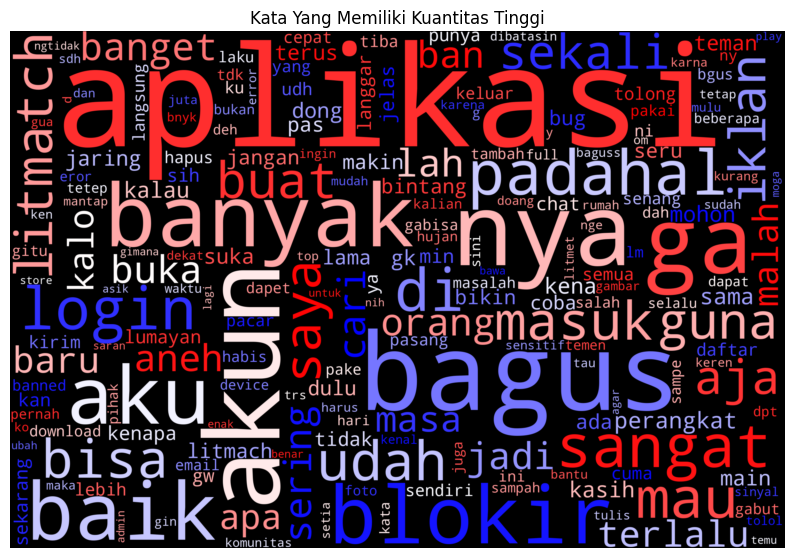

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


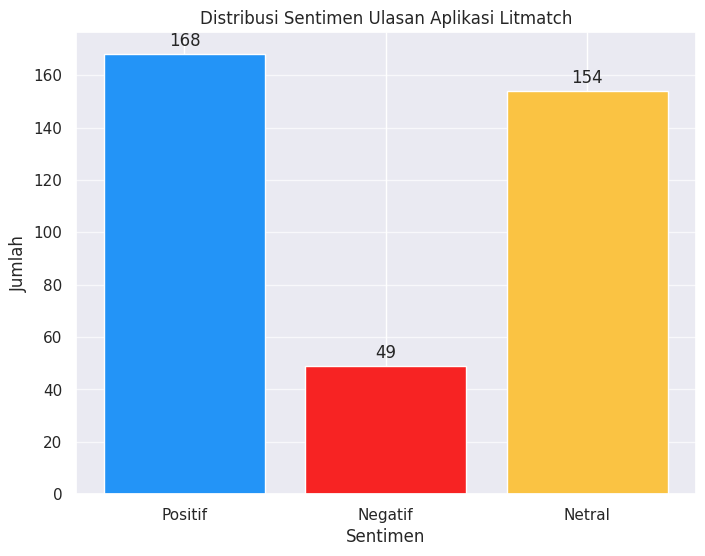

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Litmatch")


In [37]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,keren aplikasi bisa bantu nyari pacar,"fontcolor="" # FFFF00""cool app fontcolor="" # FF...",Positif
1,sangat bagus,Very good.,Positif
2,bagus sekali bisa kenal banyak teman aplikasi,It's good to know a lot of app friends.,Positif
5,moga aplikasi bagus,Good application moga,Positif
7,mantap bagus,That's great. That's great.,Positif
...,...,...,...
366,lot kali aplikasi ni padahal jaring gua bagus ...,lot of times this app when my nets are nice th...,Positif
367,litmatch sangat seru sini cepat teman banyak k...,"Litmatch is so exciting here. Hurry up, guys. ...",Positif
368,coba dulu,Try it first.,Positif
369,baharu terus dulu dapet hujan diamond full skr...,The rain envelopes are still coming up. Diamon...,Positif


In [38]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,keren aplikasi bisa bantu nyari pacar,"fontcolor="" # FFFF00""cool app fontcolor="" # FF...",1
1,sangat bagus,Very good.,1
2,bagus sekali bisa kenal banyak teman aplikasi,It's good to know a lot of app friends.,1
5,moga aplikasi bagus,Good application moga,1
7,mantap bagus,That's great. That's great.,1
...,...,...,...
366,lot kali aplikasi ni padahal jaring gua bagus ...,lot of times this app when my nets are nice th...,1
367,litmatch sangat seru sini cepat teman banyak k...,"Litmatch is so exciting here. Hurry up, guys. ...",1
368,coba dulu,Try it first.,1
369,baharu terus dulu dapet hujan diamond full skr...,The rain envelopes are still coming up. Diamon...,1


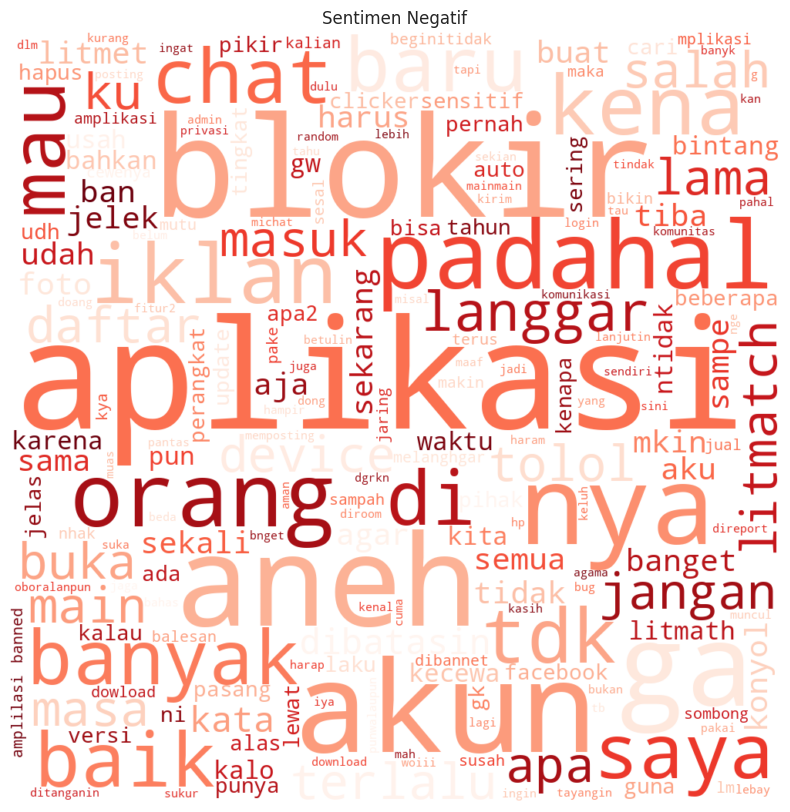

In [39]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

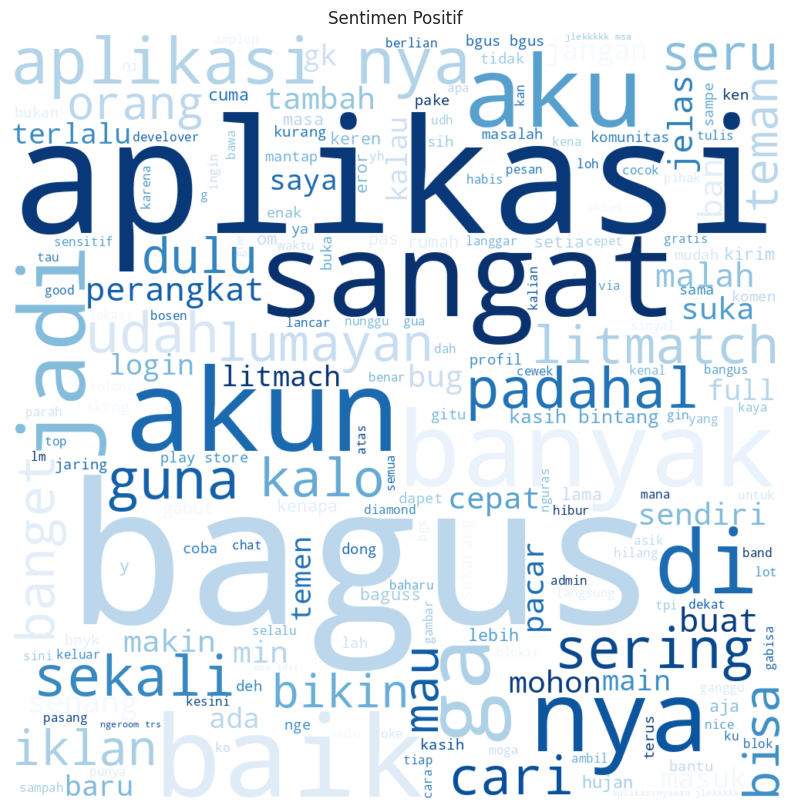

In [40]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [41]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    168
0     49
Name: count, dtype: int64

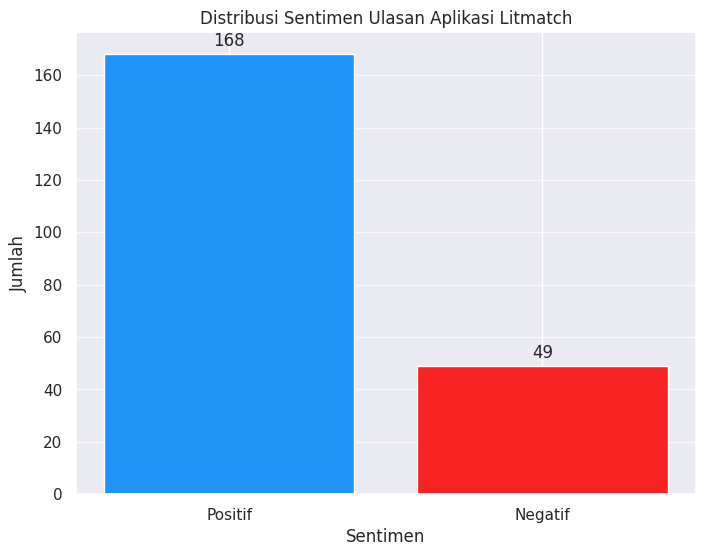

In [42]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Litmatch")

# **Data Preparation & Modeling**

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [44]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
X_train

150             bagus cara tup up nyh gi mana pake pulsa
170                                     bagus banget sih
236    untuk developer baik masalah login akun selalu...
366    lot kali aplikasi ni padahal jaring gua bagus ...
153    maaf aplikasi y oke bagus tolong y pandu komun...
                             ...                        
183    kalo bikin aplikasi jngn kikir lah masa match ...
26     aplikasi tolol hp gw jadi kena ban device pada...
165    tidak masuk tulis keluar app hapus auto clicke...
307                                       aplikasi bagus
179                                                 enak
Name: content, Length: 173, dtype: object

In [46]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
vectorizer.fit(X_train)


CountVectorizer()

In [47]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [48]:
X_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.7727272727272727
Akurasi untuk c = 0.05: 0.8409090909090909
Akurasi untuk c = 0.25: 0.8181818181818182
Akurasi untuk c = 0.5: 0.8181818181818182
Akurasi untuk c = 0.75: 0.8181818181818182
Akurasi untuk c = 1: 0.8181818181818182


In [50]:
svm = LinearSVC(C = 1.0)
svm.fit(X_train_vec, y_train)

LinearSVC()

In [51]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8181818181818182 


In [52]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.82
[[ 4  6]
 [ 2 32]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.84      0.94      0.89        34

    accuracy                           0.82        44
   macro avg       0.75      0.67      0.69        44
weighted avg       0.80      0.82      0.80        44



# **Testing**


In [54]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : aneh dan ngga jelas bgst
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [56]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus bisa mendapat pacar
Hasil Analisis Sentimen Untuk Teks Baru : Positif
